# Revisando as possiveis Tabelas

In [1]:
# abrir bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline

# Base Final

In [2]:
final = pd.read_csv('C:/Users/afilg/OneDrive/DATA SCIENCE/Aulas - Originais/Projeto_Integrador/final.csv')

In [3]:
final = final.drop(['Unnamed: 0'], axis = 1)

In [4]:
final.head(2).T

,0,1
tconst,tt0118589,tt0120681
primaryTitle,Glitter,From Hell
startYear,2001,2001
runtimeMinutes,104,122
genre_1,Drama,Horror
...,...,...
writer_1_ratingAverage,NaN,NaN
writer_2_ratingAverage,6.9,NaN
AvgRating,5.8,6.25821
numFilmes,0.25,1


In [5]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tconst                                1490 non-null   object 
 1   primaryTitle                          1490 non-null   object 
 2   startYear                             1490 non-null   int64  
 3   runtimeMinutes                        1490 non-null   int64  
 4   genre_1                               1490 non-null   object 
 5   genre_2                               1373 non-null   object 
 6   genre_3                               997 non-null    object 
 7   Item                                  1490 non-null   int64  
 8   Mês                                   1490 non-null   object 
 9   month                                 1490 non-null   float64
 10  day                                   1490 non-null   float64
 11  year             

In [6]:
final = final.drop(['Mês','Item','Data Portugues','on_streaming_date','Negative','Positive','All','movieyear','directors_1','directors_2','writers_1','writers_2','rating_num','tomatometer_rating','tomatometer_count','audience_want_to_see_count','audience_rating','audience_count','audience_top_critics_count','audience_fresh_critics_count','audience_rotten_critics_count','audience_fresh_top_critics_count','audience_rotten_rotten_critics_count','tomatometer_avg_rating','audience_top_critics_avg_rating','score_sentiment','startYear', 'log_rentability'], axis = 1)                           

In [7]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tconst                     1490 non-null   object 
 1   primaryTitle               1490 non-null   object 
 2   runtimeMinutes             1490 non-null   int64  
 3   genre_1                    1490 non-null   object 
 4   genre_2                    1373 non-null   object 
 5   genre_3                    997 non-null    object 
 6   month                      1490 non-null   float64
 7   day                        1490 non-null   float64
 8   year                       1490 non-null   int64  
 9   FW                         1490 non-null   int64  
 10  Worldwide_Gross            1490 non-null   float64
 11  Production_Budget          1490 non-null   float64
 12  rentability                1490 non-null   float64
 13  rating                     1490 non-null   objec

# Dummização

## Generos

In [8]:
Genero1 = pd.get_dummies(final['genre_1'])

In [9]:
Genero1.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Sci-Fi,Thriller
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [10]:
Genero2 = pd.get_dummies(final['genre_2'])

In [11]:
Genero2.head()

,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
Genero3 = pd.get_dummies(final['genre_3'])

In [13]:
Genero3.head()

,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [14]:
Generos = Genero1.join(Genero2, rsuffix = "_2")
Generos = Generos.join(Genero3, rsuffix = "_3")

In [15]:
Generos['Adventure_Geral']=Generos['Adventure']+Generos['Adventure_2']
Generos['Animation_Geral']=Generos['Animation']+Generos['Animation_2']+Generos['Animation_3']
Generos['Biography_Geral']=Generos['Biography']+Generos['Biography_2']+Generos['Biography_3']
Generos['Comedy_Geral']=Generos['Comedy']+Generos['Comedy_2']+Generos['Comedy_3']
Generos['Crime_Geral']=Generos['Crime']+Generos['Crime_2']+Generos['Crime_3']
Generos['Documentary_Geral']=Generos['Documentary']+Generos['Documentary_2']
Generos['Drama_Geral']=Generos['Drama']+Generos['Drama_2']+Generos['Drama_3']
Generos['Family_Geral']=Generos['Family']+Generos['Family_3']
Generos['Fantasy_Geral']=Generos['Fantasy']+Generos['Fantasy_2']+Generos['Fantasy_3']
Generos['History_Geral']=Generos['History']+Generos['History_3']
Generos['Horror_Geral']=Generos['Horror']+Generos['Horror_2']+Generos['Horror_3']
Generos['Music_Geral']=Generos['Music']+Generos['Music_3']
Generos['Musical_Geral']=Generos['Musical']+Generos['Musical_2']+Generos['Musical_3']
Generos['Mystery_Geral']=Generos['Mystery']+Generos['Mystery_2']+Generos['Mystery_3']
Generos['Romance_Geral']=Generos['Romance']+Generos['Romance_3']
Generos['Sci-Fi_Geral']=Generos['Sci-Fi']+Generos['Sci-Fi_2']+Generos['Sci-Fi_3']
Generos['Sport_Geral']=Generos['Sport']+Generos['Sport_3']
Generos['Thriller_Geral']=Generos['Thriller']+Generos['Thriller_2']+Generos['Thriller_3']
Generos['War_Geral']=Generos['War']+Generos['War_3']
Generos['Western_Geral']=Generos['Western']+Generos['Western_3']

In [16]:
Generos = Generos.drop(['Action','Adventure','Adventure_2','Animation','Animation_2','Animation_3','Biography','Biography_2','Biography_3','Comedy','Comedy_2','Comedy_3','Crime','Crime_2','Crime_3','Documentary','Documentary_2','Drama','Drama_2','Drama_3','Family','Family_3','Fantasy','Fantasy_2','Fantasy_3','History','History_3','Horror','Horror_2','Horror_3','Music','Music_3','Musical','Musical_2','Musical_3','Mystery','Mystery_2','Mystery_3','Romance','Romance_3','Sci-Fi','Sci-Fi_2','Sci-Fi_3','Sport','Sport_3','Thriller','Thriller_2','Thriller_3','War','War_3','Western','Western_3'],axis = 1)

In [17]:
Generos

,Adventure_Geral,Animation_Geral,Biography_Geral,Comedy_Geral,Crime_Geral,Documentary_Geral,Drama_Geral,Family_Geral,Fantasy_Geral,History_Geral,Horror_Geral,Music_Geral,Musical_Geral,Mystery_Geral,Romance_Geral,Sci-Fi_Geral,Sport_Geral,Thriller_Geral,War_Geral,Western_Geral
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1486,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1487,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1488,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [18]:
final_generos = final.join(Generos)

In [19]:
final_generos = final_generos.drop(['genre_1','genre_2','genre_3'], axis = 1)

## Estudios

In [20]:
temp = pd.pivot_table(final_generos, values='tconst', index='studio_name', aggfunc='count')
temp

,tconst
studio_name,
20th Century Fox,122
20th Century Fox Distribution,1
20th Century Fox/Regency Films,1
A24,5
A24 Films,2
...,...
Working Title Films,1
Yari Film Group,1
Yari Film Group Releasing,1


In [21]:
studios = pd.read_csv('C:/Users/afilg/OneDrive/DATA SCIENCE/Aulas - Originais/Projeto_Integrador/test_2.csv')

In [22]:
studios.head()

,studio_name,new_studio
0,20th Century Fox,Big_Studio
1,20th Century Fox Distribution,Big_Studio
2,20th Century Fox/Regency Films,Big_Studio
3,Blue Sky Studio/20th Century Fox,Big_Studio
4,Fox Atomic,Big_Studio


In [23]:
final_generos = final_generos.join(studios.set_index('studio_name'), on = 'studio_name')

In [24]:
final_generos = final_generos.drop(['studio_name'], axis = 1)

In [25]:
studios = pd.get_dummies(final_generos['new_studio'])

In [26]:
final_generos_studios = final_generos.join(studios)

In [27]:
final_generos_studios = final_generos_studios.drop(['new_studio'], axis = 1)

In [28]:
final_generos_studios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tconst                     1490 non-null   object 
 1   primaryTitle               1490 non-null   object 
 2   runtimeMinutes             1490 non-null   int64  
 3   month                      1490 non-null   float64
 4   day                        1490 non-null   float64
 5   year                       1490 non-null   int64  
 6   FW                         1490 non-null   int64  
 7   Worldwide_Gross            1490 non-null   float64
 8   Production_Budget          1490 non-null   float64
 9   rentability                1490 non-null   float64
 10  rating                     1490 non-null   object 
 11  movie_info                 1490 non-null   object 
 12  tomatometer_status         1490 non-null   object 
 13  audience_status            1490 non-null   objec

In [29]:
final_generos_studios_rt = final_generos_studios

In [30]:
final_generos_studios_rt = final_generos_studios_rt.drop(['tomatometer_status','audience_status'], axis = 1)

## Ratings


In [31]:
rating = pd.get_dummies(final_generos_studios_rt['rating'])

In [32]:
final_generos_studios_rt = final_generos_studios_rt.join(rating)

In [69]:
final_generos_studios_rt = final_generos_studios_rt.drop(['rating'], axis = 1)

# Analise da Target

## Analise Inicial

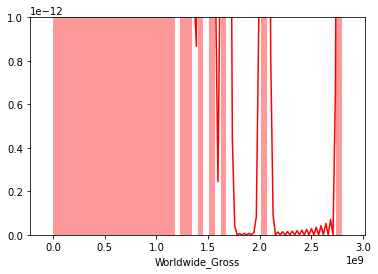

In [33]:
sns.distplot(final['Worldwide_Gross'], color="Red", label="Rentabilidade")


In [34]:
final.Worldwide_Gross.describe()

count    1.490000e+03
mean     1.388615e+08
std      2.241537e+08
min      1.263600e+04
25%      2.021552e+07
50%      6.302140e+07
75%      1.592552e+08
max      2.797801e+09
Name: Worldwide_Gross, dtype: float64

### Relacao com Production Budget

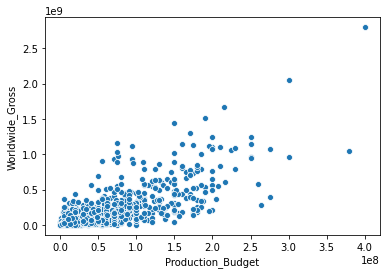

In [83]:
ax = sns.scatterplot(x="Production_Budget", y="Worldwide_Gross", data=final)

### Por Genero

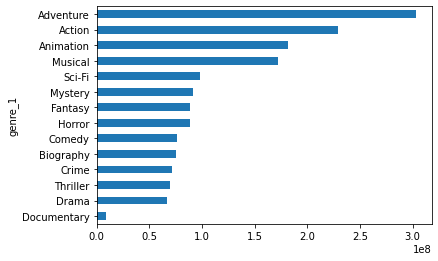

In [35]:
final.groupby(['genre_1']).Worldwide_Gross.mean().sort_values().plot(kind = 'barh')

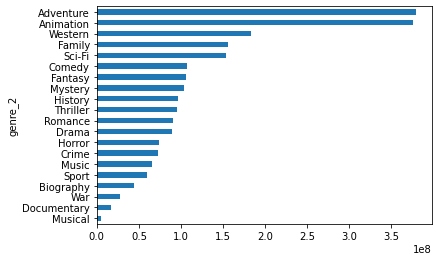

In [36]:
final.groupby(['genre_2']).Worldwide_Gross.mean().sort_values().plot(kind = 'barh')

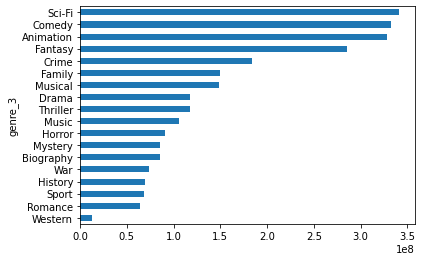

In [37]:
final.groupby(['genre_3']).Worldwide_Gross.mean().sort_values().plot(kind = 'barh')

### Por Rating

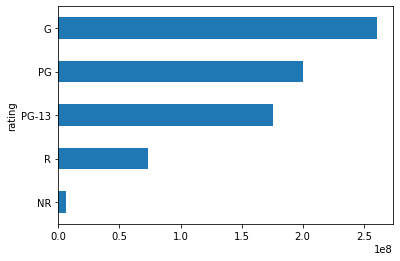

In [38]:
final.groupby(['rating']).Worldwide_Gross.mean().sort_values().plot(kind = 'barh')

### Studios

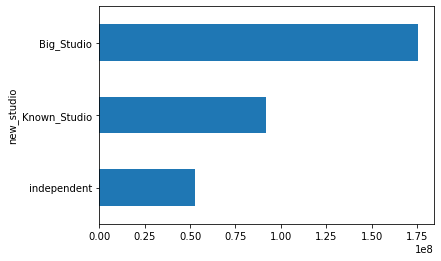

In [39]:
final_generos.groupby(['new_studio']).Worldwide_Gross.mean().sort_values().plot(kind = 'barh')

### Financial Week

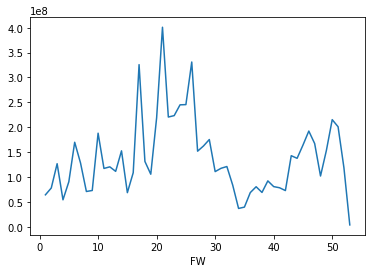

In [40]:
final.groupby(['FW']).Worldwide_Gross.mean().plot()

### Run Time

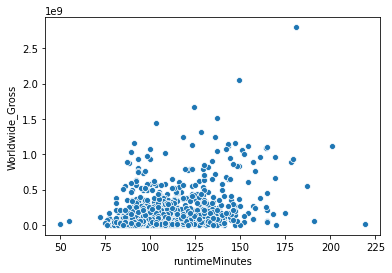

In [41]:
ax = sns.scatterplot(x="runtimeMinutes", y="Worldwide_Gross", data=final)

### Critic Positive Reviews

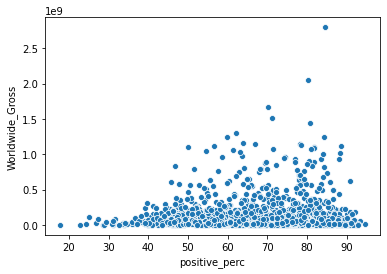

In [42]:
ax = sns.scatterplot(x="positive_perc", y="Worldwide_Gross", data=final)

### IMDB Rating Data

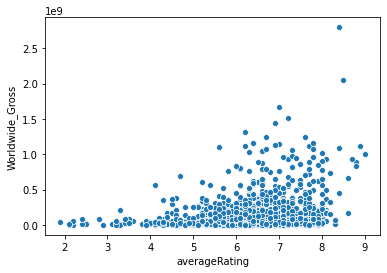

In [43]:
ax = sns.scatterplot(x="averageRating", y="Worldwide_Gross", data=final)

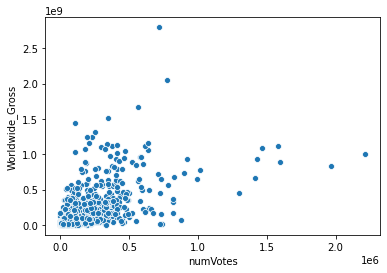

In [44]:
ax = sns.scatterplot(x="numVotes", y="Worldwide_Gross", data=final)

### Director Data

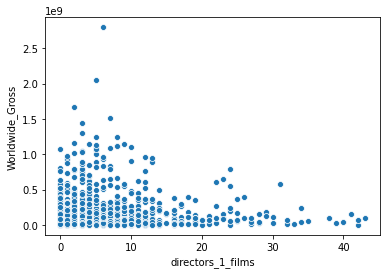

In [45]:
ax = sns.scatterplot(x="directors_1_films", y="Worldwide_Gross", data=final)

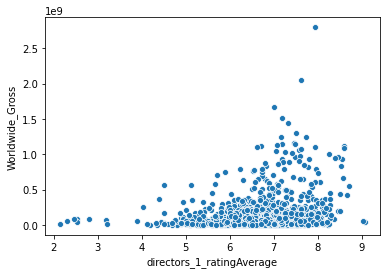

In [46]:
ax = sns.scatterplot(x="directors_1_ratingAverage", y="Worldwide_Gross", data=final)

### Writer Data

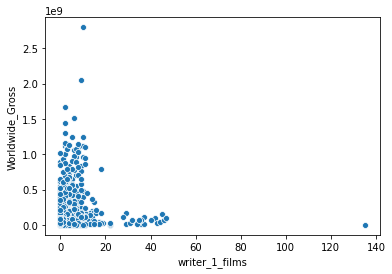

In [47]:
ax = sns.scatterplot(x="writer_1_films", y="Worldwide_Gross", data=final)

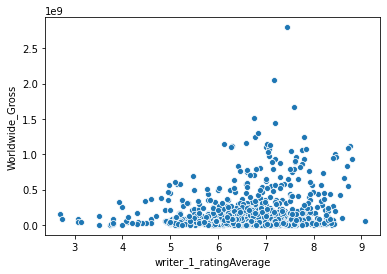

In [48]:
ax = sns.scatterplot(x="writer_1_ratingAverage", y="Worldwide_Gross", data=final)

### Actors Data

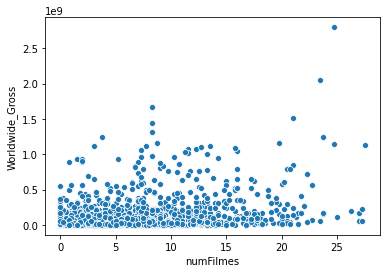

In [49]:
ax = sns.scatterplot(x="numFilmes", y="Worldwide_Gross", data=final)

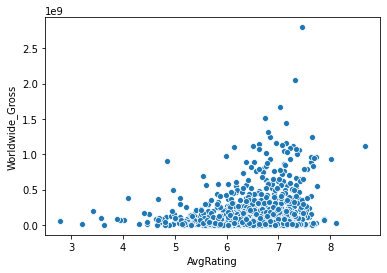

In [50]:
ax = sns.scatterplot(x="AvgRating", y="Worldwide_Gross", data=final)

### Numero de Crew

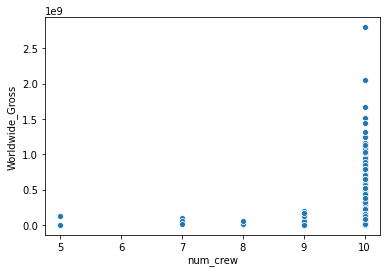

In [51]:
ax = sns.scatterplot(x="num_crew", y="Worldwide_Gross", data=final)

## Normalizando

In [52]:
final_generos_studios_rt['log_gross'] = np.log(final_generos_studios_rt['Worldwide_Gross'])

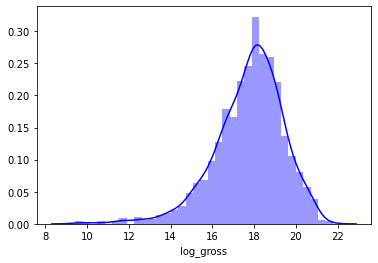

In [54]:
sns.distplot(final_generos_studios_rt['log_gross'], color="Blue", label="Log Gross")

# Visualização Final

In [55]:
final_generos_studios_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tconst                     1490 non-null   object 
 1   primaryTitle               1490 non-null   object 
 2   runtimeMinutes             1490 non-null   int64  
 3   month                      1490 non-null   float64
 4   day                        1490 non-null   float64
 5   year                       1490 non-null   int64  
 6   FW                         1490 non-null   int64  
 7   Worldwide_Gross            1490 non-null   float64
 8   Production_Budget          1490 non-null   float64
 9   rentability                1490 non-null   float64
 10  rating                     1490 non-null   object 
 11  movie_info                 1490 non-null   object 
 12  audience_avg_rating        1490 non-null   float64
 13  negative_perc              1490 non-null   float

In [56]:
final_generos_studios_rt.head().T

,0,1,2,3,4
tconst,tt0118589,tt0120681,tt0120737,tt0120755,tt0122459
primaryTitle,Glitter,From Hell,The Lord of the Rings: The Fellowship of the Ring,Mission: Impossible II,Return to Me
runtimeMinutes,104,122,178,123,115
month,9,10,12,5,4
day,21,19,19,24,7
...,...,...,...,...,...
NR,0,0,0,0,0
PG,0,0,0,0,1
PG-13,1,0,1,1,0
R,0,1,0,0,0


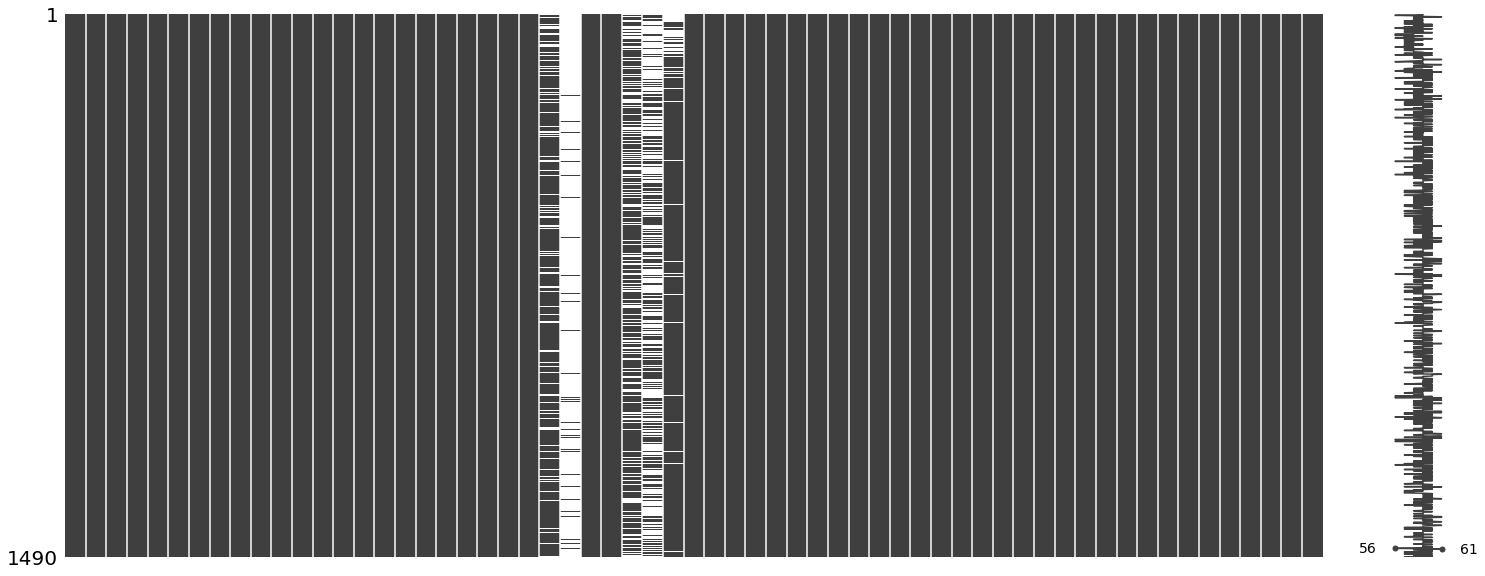

In [57]:
import missingno as msno
msno.matrix(final_generos_studios_rt)

In [58]:
final_generos_studios_rt = final_generos_studios_rt.fillna(0)

In [59]:
final_generos_studios_rt = final_generos_studios_rt.drop(['directors_2_films','directors_2_ratingAverage','writer_2_films','writer_2_ratingAverage','audience_avg_rating','NPremium_Indicado','NPremium_Win','Premium_Indicado','Premium_Win','month','rentability','negative_perc', 'day', 'year','movie_info', 'num_crew'], axis = 1)

In [60]:
final_generos_studios_rt.shape

(1490, 45)

In [61]:
final_generos_studios_rt.head(2).T

,0,1
tconst,tt0118589,tt0120681
primaryTitle,Glitter,From Hell
runtimeMinutes,104,122
FW,38,42
Worldwide_Gross,4.27337e+06,6.87124e+07
Production_Budget,8.5e+06,3.5e+07
rating,PG-13,R
positive_perc,46.4286,66.6667
averageRating,2.2,6.8
numVotes,21167,143578


# Correlação

In [62]:
## Positive

final_generos_studios_rt.corr()['Worldwide_Gross'].sort_values(ascending = False).head(5)

Worldwide_Gross      1.000000
Production_Budget    0.764322
log_gross            0.661790
numVotes             0.606467
Adventure_Geral      0.478171
Name: Worldwide_Gross, dtype: float64

In [63]:
## Negative

final_generos_studios_rt.corr()['Worldwide_Gross'].sort_values(ascending = False).tail(5)

Known_Studio    -0.105472
Romance_Geral   -0.125272
independent     -0.166466
Drama_Geral     -0.225349
R               -0.239914
Name: Worldwide_Gross, dtype: float64

# Clustering

## K-Mean

In [71]:
columns = final_generos_studios_rt.drop(['tconst','primaryTitle','log_gross','Worldwide_Gross','averageRating','numVotes','positive_perc' ], axis = 1)

In [72]:
final_generos_studios_rt.shape

(1490, 44)

In [73]:
X_sample = columns.values 
y_sample = final.loc[:,'Worldwide_Gross'].values 

In [74]:
X_sample.shape

(1490, 37)

In [75]:
# plotando o silhouette score
# variância ideal é aquela mais perto de 1, por isso queremos o maior silhouette score

from sklearn.metrics import silhouette_score   
from sklearn.cluster import KMeans

sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X_sample)
    sillhoute_scores.append(silhouette_score(X_sample, kmeans.labels_))

([<matplotlib.axis.XTick at 0x2489b681fc8>,
 <a list of 31 Text major ticklabel objects>)

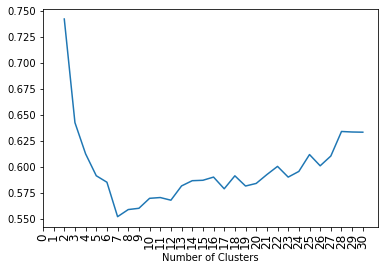

In [76]:
plt.plot(n_cluster_list,sillhoute_scores)
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 31), fontsize=12, rotation=90)

In [77]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
final_generos_studios_rt['cluster'] = kmeans.labels_

## Cluster Analisis

### Basic Analysis

In [80]:
def plotcolum(a,b):
    plt.figure(figsize=(10,5))
    sns.countplot(y = a, data = b, order = a.value_counts().index)
    plt.show()

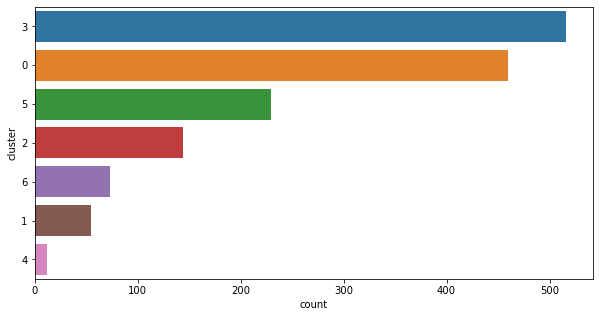

In [81]:
plotcolum(final_generos_studios_rt['cluster'],final_generos_studios_rt)

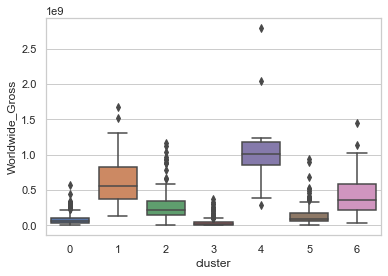

In [84]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='Worldwide_Gross',data = tips)

### Por Genero

In [85]:
Values = ['Adventure_Geral','Animation_Geral','Biography_Geral','Comedy_Geral','Crime_Geral','Documentary_Geral','Drama_Geral','Family_Geral','Fantasy_Geral','History_Geral','Horror_Geral','Music_Geral','Musical_Geral','Mystery_Geral','Romance_Geral','Sci-Fi_Geral','Sport_Geral','Thriller_Geral','War_Geral','Western_Geral']

In [86]:
Generos = pd.DataFrame(pd.pivot_table(final_generos_studios_rt, values=Values, index=['cluster'], aggfunc=np.sum).T)

In [87]:
Generos

cluster,0,1,2,3,4,5,6
Adventure_Geral,59.0,47.0,62.0,32.0,12.0,52.0,57.0
Animation_Geral,14.0,9.0,31.0,8.0,1.0,21.0,25.0
Biography_Geral,46.0,0.0,8.0,53.0,0.0,17.0,1.0
Comedy_Geral,204.0,12.0,67.0,235.0,1.0,100.0,28.0
Crime_Geral,111.0,3.0,18.0,81.0,1.0,50.0,4.0
Documentary_Geral,0.0,0.0,0.0,6.0,0.0,0.0,0.0
Drama_Geral,238.0,10.0,48.0,319.0,1.0,100.0,12.0
Family_Geral,33.0,9.0,15.0,26.0,0.0,20.0,7.0
Fantasy_Geral,29.0,11.0,17.0,33.0,5.0,23.0,14.0
History_Geral,13.0,0.0,6.0,11.0,0.0,9.0,1.0


### Studios

In [88]:
Values = ['Big_Studio','Known_Studio','independent']

In [89]:
Studios = pd.DataFrame(pd.pivot_table(final_generos_studios_rt, values=Values, index=['cluster'], aggfunc=np.sum).T)

In [90]:
Studios

cluster,0,1,2,3,4,5,6
Big_Studio,281.0,51.0,117.0,248.0,11.0,179.0,66.0
Known_Studio,116.0,3.0,18.0,125.0,1.0,33.0,2.0
independent,62.0,1.0,9.0,139.0,0.0,18.0,5.0


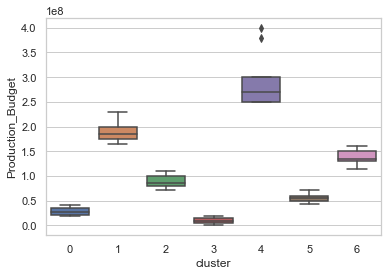

In [91]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='Production_Budget',data = tips)

In [92]:
dfs = []

clusters = [0,1,2,3,4,5,6]

for i in clusters:
    
    df = final_generos_studios_rt[final_generos_studios_rt.cluster == i]
    a = df.Production_Budget.max()
    b = df.Production_Budget.min()
    c = len(df.cluster)
    d = {'Cluster': [i], 'Size': [c], 'Min': [b],'Max': [a]}
    
    modelos = pd.DataFrame(data = d)
    dfs.append(modelos)
    
    Tabela = pd.concat(dfs)
    
Tabela.sort_values(by = 'Max')

,Cluster,Size,Min,Max
0,3,516,100000.0,19100000.0
0,0,460,19400000.0,42000000.0
0,5,230,43000000.0,72000000.0
0,2,144,72500000.0,111000000.0
0,6,73,115000000.0,160000000.0
0,1,55,165000000.0,230000000.0
0,4,12,250000000.0,400000000.0


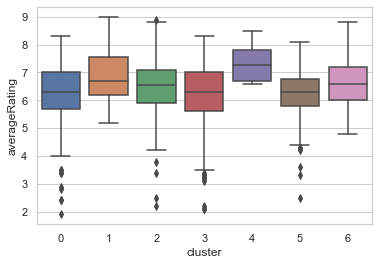

In [93]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='averageRating',data = tips)

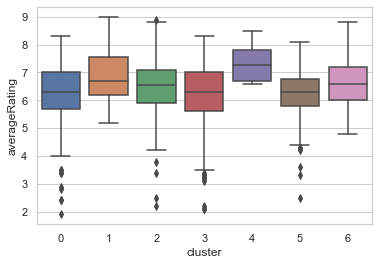

In [94]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='averageRating',data = tips)

# Regressoes Model

In [95]:
def regressoes(nome_model,X,y):
    #ignorando os warnings
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # importnado as bibliotecas com os modelos classificadores
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression
    
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # definindo uma lista com todos os classificadores
    regressors = [
        LinearRegression(),
        RandomForestRegressor(),
        GradientBoostingRegressor()]

    # definindo o tamanho da figura para o gráfico
    plt.figure(figsize=(12,8))

    # rotina para instanciar, predizer e medir os rasultados de todos os modelos
    dfs = []

    for regr in regressors:
        # instanciando o modelo
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        # armazenando o nome do modelo na variável name
        name = regr.__class__.__name__
        #Metricas
        from sklearn.metrics import mean_squared_error
        from sklearn.metrics import r2_score

        R2_train = regr.score(X_train, y_train)
        MSE = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        Accuracy = 100-(np.sum(np.abs((y_test - y_pred)/y_test))*100)/len(y_test)
        R2_test = regr.score(X_test, y_test)

        d = {'Processo': [nome_model], 'Modelo': [name],'MSE': [MSE.round(4)], 'RMSE': [rmse.round(4)], 'Accuracy': [Accuracy.round(4)], 'R2_train': [R2_train.round(4)], 'R2_test': [R2_test.round(4)]}
        modelos = pd.DataFrame(data = d)

        dfs.append(modelos)

    Tabela = pd.concat(dfs)

    return Tabela    

# Escolhendo Regressao

## Modelo Inicial

In [96]:
columns = final_generos_studios_rt.drop(['tconst','primaryTitle','Worldwide_Gross', 'log_gross'], axis=1)

X= columns.values
y = final_generos_studios_rt['Worldwide_Gross']

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
#y = minmax_scale(y)

dfs = []

for i in distributions:
    minmax = regressoes(i[0],i[1],y)
    dfs.append(minmax)

Tabela = pd.concat(dfs)

Tabela.sort_values(by = 'Accuracy', ascending = False)

,Processo,Modelo,MSE,RMSE,Accuracy,R2_train,R2_test
0,Data after quantile transformation (gaussian pdf),GradientBoostingRegressor,1.610619e+16,1.269102e+08,-129.2514,0.9325,0.6562
0,Data after quantile transformation (uniform pdf),GradientBoostingRegressor,1.631216e+16,1.277191e+08,-129.7578,0.9325,0.6518
0,Data after quantile transformation (gaussian pdf),RandomForestRegressor,1.610137e+16,1.268912e+08,-133.0110,0.9656,0.6563
0,Data after min-max scaling,GradientBoostingRegressor,1.614293e+16,1.270548e+08,-137.8981,0.9329,0.6554
0,Data after max-abs scaling,GradientBoostingRegressor,1.617369e+16,1.271758e+08,-138.1464,0.9329,0.6548
0,Data after robust scaling,GradientBoostingRegressor,1.628352e+16,1.276069e+08,-138.1644,0.9329,0.6524
0,Data after power transformation (Yeo-Johnson),GradientBoostingRegressor,1.610373e+16,1.269005e+08,-138.1771,0.9329,0.6563
0,Unscaled data,GradientBoostingRegressor,1.612017e+16,1.269652e+08,-138.5263,0.9329,0.6559
0,Data after standard scaling,GradientBoostingRegressor,1.621780e+16,1.273491e+08,-138.8089,0.9329,0.6538
0,Data after standard scaling,RandomForestRegressor,1.599096e+16,1.264554e+08,-142.9597,0.9627,0.6587


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

## Using Scalers

### y = minmax_scale(y)

In [98]:
columns = final_generos_studios_rt.drop(['tconst','primaryTitle','Worldwide_Gross', 'log_gross'], axis=1)

X= columns

y = final_generos_studios_rt['Worldwide_Gross']

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y)

dfs = []

for i in distributions:
    minmax = regressoes(i[0],i[1],y)
    dfs.append(minmax)

Tabela = pd.concat(dfs)

Tabela.sort_values(by = 'Accuracy', ascending = False)

,Processo,Modelo,MSE,RMSE,Accuracy,R2_train,R2_test
0,Data after quantile transformation (uniform pdf),GradientBoostingRegressor,0.0021,0.0458,-135.1311,0.9325,0.6501
0,Data after quantile transformation (gaussian pdf),GradientBoostingRegressor,0.0021,0.0454,-141.3654,0.9325,0.6551
0,Data after quantile transformation (gaussian pdf),RandomForestRegressor,0.0021,0.0464,-141.8850,0.9651,0.6409
0,Data after min-max scaling,GradientBoostingRegressor,0.0021,0.0460,-143.3448,0.9329,0.6457
0,Data after robust scaling,GradientBoostingRegressor,0.0021,0.0454,-143.6425,0.9329,0.6557
0,Data after standard scaling,GradientBoostingRegressor,0.0021,0.0459,-143.9320,0.9329,0.6483
0,Unscaled data,GradientBoostingRegressor,0.0021,0.0454,-144.5683,0.9329,0.6549
0,Data after max-abs scaling,GradientBoostingRegressor,0.0021,0.0454,-144.6409,0.9329,0.6556
0,Data after power transformation (Yeo-Johnson),GradientBoostingRegressor,0.0021,0.0454,-148.8437,0.9329,0.6552
0,Data after power transformation (Yeo-Johnson),RandomForestRegressor,0.0020,0.0446,-151.4699,0.9638,0.6679


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

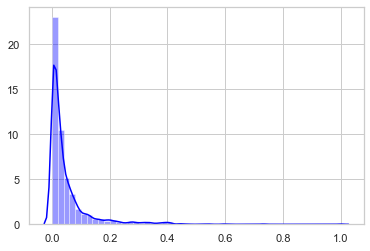

In [100]:
sns.distplot(y, color="Blue", label="Ajusted Rentabilidade")

### y = np.log(y)

In [101]:
columns = final_generos_studios_rt.drop(['tconst','primaryTitle','Worldwide_Gross', 'log_gross'], axis=1)

X= columns

y = final_generos_studios_rt['log_gross']

In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = np.log(y)

dfs = []

for i in distributions:
    minmax = regressoes(i[0],i[1],y)
    dfs.append(minmax)

Tabela = pd.concat(dfs)

Tabela.sort_values(by = 'Accuracy', ascending = False)

,Processo,Modelo,MSE,RMSE,Accuracy,R2_train,R2_test
0,Data after min-max scaling,RandomForestRegressor,0.0032,0.0566,98.6278,0.9517,0.6528
0,Data after quantile transformation (gaussian pdf),RandomForestRegressor,0.0031,0.0558,98.6184,0.9546,0.6625
0,Data after standard scaling,RandomForestRegressor,0.0032,0.0564,98.6163,0.9517,0.6549
0,Unscaled data,RandomForestRegressor,0.0032,0.0563,98.6076,0.9504,0.6554
0,Data after power transformation (Yeo-Johnson),RandomForestRegressor,0.0032,0.0562,98.6072,0.9508,0.6576
0,Data after quantile transformation (gaussian pdf),GradientBoostingRegressor,0.0031,0.0555,98.6035,0.8625,0.6661
0,Data after robust scaling,RandomForestRegressor,0.0032,0.0565,98.6023,0.9529,0.6539
0,Data after max-abs scaling,RandomForestRegressor,0.0032,0.0569,98.5982,0.9504,0.6488
0,Unscaled data,GradientBoostingRegressor,0.0032,0.0562,98.5975,0.8625,0.6575
0,Data after standard scaling,GradientBoostingRegressor,0.0031,0.0558,98.5974,0.8625,0.6618


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

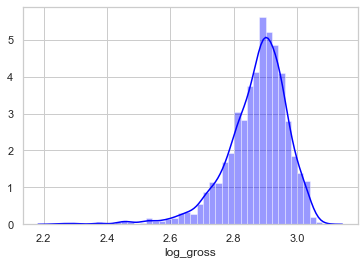

In [103]:
sns.distplot(y, color="Blue", label="Ajusted Rentabilidade")

### log + MinMax

In [104]:
columns = final_generos_studios_rt.drop(['tconst','primaryTitle','Worldwide_Gross','log_gross'], axis=1)

X= columns

y = final_generos_studios_rt['log_gross']

In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y)

dfs = []

for i in distributions:
    minmax = regressoes(i[0],i[1],y)
    dfs.append(minmax)

Tabela = pd.concat(dfs)

Tabela.sort_values(by = 'Accuracy', ascending = False)

,Processo,Modelo,MSE,RMSE,Accuracy,R2_train,R2_test
0,Data after quantile transformation (gaussian pdf),GradientBoostingRegressor,0.0053,0.0727,90.4356,0.8645,0.6987
0,Data after standard scaling,RandomForestRegressor,0.0053,0.0728,90.4153,0.9577,0.6974
0,Data after robust scaling,RandomForestRegressor,0.0054,0.0732,90.4051,0.9586,0.6941
0,Data after max-abs scaling,RandomForestRegressor,0.0052,0.0724,90.3873,0.9576,0.7011
0,Data after max-abs scaling,GradientBoostingRegressor,0.0053,0.0729,90.3785,0.8638,0.6965
0,Data after quantile transformation (uniform pdf),GradientBoostingRegressor,0.0054,0.0733,90.3539,0.8645,0.6936
0,Data after power transformation (Yeo-Johnson),GradientBoostingRegressor,0.0053,0.0730,90.3351,0.8638,0.6958
0,Data after min-max scaling,GradientBoostingRegressor,0.0054,0.0736,90.3135,0.8638,0.6906
0,Data after power transformation (Yeo-Johnson),LinearRegression,0.0052,0.0723,90.3100,0.7203,0.7016
0,Unscaled data,GradientBoostingRegressor,0.0054,0.0736,90.2946,0.8638,0.6908


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

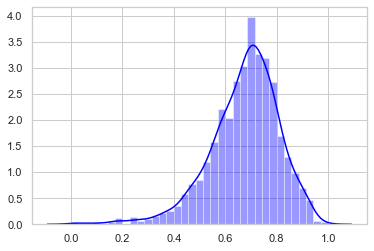

In [106]:
sns.distplot(y, color="Blue", label="Ajusted Rentabilidade")

## Entendendo o melhor Boosting

Podemos ver que entre o modelo linar, o modelo de ensambles paralelos (Random Forest) e o de ensambles sequenciais (Gradient Boosting) o modelo de ensambles sequenciais é o que possui o melhor resultado. 

Agora devemos buscar entender se outros algoritimos de Boosting nao seriam mais eficientes que o Gradient Boosting.

Aqui analizaremos 4 distitos:
- Gradient Boosing
- XgBoosting
- LightGBM
- Ada Boost

In [107]:
columns = final_generos_studios_rt.drop(['tconst','primaryTitle','Worldwide_Gross','log_gross'], axis=1)

X= columns

y = final_generos_studios_rt['log_gross']

In [108]:
from sklearn.preprocessing import StandardScaler
X = RobustScaler(quantile_range=(25, 75)).fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2, random_state=42)

In [110]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor()
gbrt.fit(x_train, y_train)

#  LightGBM
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()                       
lgb_model.fit(x_train, y_train)
 
# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(verbosity=0)
xgb_model.fit(x_train, y_train)

# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_clf = AdaBoostRegressor(
    DecisionTreeRegressor())
ada_clf.fit(x_train, y_train)

print('*****************ClassifiersDone*****************')

*****************ClassifiersDone*****************


In [111]:

models=['GradientBoost','LightGBM','XGBoost','AdaBoost']
Trainning_Accuracy=[gbrt.score(x_train, y_train),
                    lgb_model.score(x_train, y_train),
                    xgb_model.score(x_train, y_train), 
                    ada_clf.score(x_train, y_train)]
Validation_Accuracy=[gbrt.score(x_val, y_val),
                    lgb_model.score(x_val, y_val),
                    xgb_model.score(x_val, y_val), 
                    ada_clf.score(x_val, y_val)]
pd.DataFrame(list(zip(Trainning_Accuracy, Validation_Accuracy)), 
                  columns =['Trainning_R2', 'Validation_R2'],
                  index=models)

,Trainning_R2,Validation_R2
GradientBoost,0.863756,0.696582
LightGBM,0.964602,0.688223
XGBoost,0.844604,0.698396
AdaBoost,0.999478,0.688750


## Com Cluster

In [112]:
modelo_cluster = final_generos_studios_rt.copy()

columns = modelo_cluster.drop(['tconst','primaryTitle','log_gross','Worldwide_Gross'], axis=1)

X= columns
# variável target
y = modelo_cluster['log_gross']
# dividindo oa dados em treino e teste

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
#y = minmax_scale(y)

dfs = []

for i in distributions:
    minmax = regressoes(i[0],i[1],y)
    dfs.append(minmax)

Tabela = pd.concat(dfs)

Tabela['R2_diff'] = Tabela['R2_train'] - Tabela['R2_test']

Tabela.sort_values(by = 'Accuracy', ascending = False)

,Processo,Modelo,MSE,RMSE,Accuracy,R2_train,R2_test,R2_diff
0,Data after min-max scaling,RandomForestRegressor,0.7976,0.8931,96.1341,0.9597,0.6995,0.2602
0,Data after quantile transformation (gaussian pdf),RandomForestRegressor,0.8129,0.9016,96.1135,0.9583,0.6937,0.2646
0,Data after standard scaling,RandomForestRegressor,0.7928,0.8904,96.1079,0.9575,0.7013,0.2562
0,Data after quantile transformation (uniform pdf),RandomForestRegressor,0.8180,0.9044,96.1007,0.9549,0.6918,0.2631
0,Data after robust scaling,RandomForestRegressor,0.8146,0.9026,96.0931,0.9581,0.6931,0.2650
0,Data after quantile transformation (gaussian pdf),GradientBoostingRegressor,0.8190,0.9050,96.0693,0.8645,0.6915,0.1730
0,Data after power transformation (Yeo-Johnson),LinearRegression,0.7920,0.8900,96.0675,0.7203,0.7016,0.0187
0,Data after quantile transformation (uniform pdf),GradientBoostingRegressor,0.8122,0.9012,96.0635,0.8645,0.6940,0.1705
0,Data after max-abs scaling,GradientBoostingRegressor,0.8039,0.8966,96.0618,0.8638,0.6971,0.1667
0,Data after max-abs scaling,RandomForestRegressor,0.8473,0.9205,96.0597,0.9585,0.6808,0.2777


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

# Boosting

## XGBoost Analise de Erro

In [114]:
semmin = final_generos_studios_rt.copy()

columns = semmin.drop(['tconst','primaryTitle','Worldwide_Gross','log_gross'], axis=1)

X = columns
# variável target
y = semmin['log_gross']

In [115]:
from sklearn.preprocessing import PowerTransformer
X = PowerTransformer(method='yeo-johnson').fit_transform(X)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X.shape

(1490, 41)

In [118]:
X_train.shape

(1192, 41)

In [119]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(verbosity=0)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X)

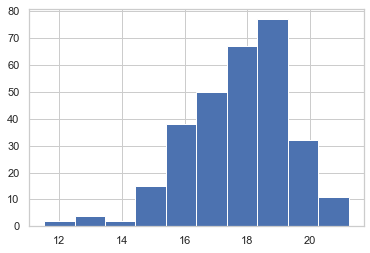

In [120]:
y_test.hist()

In [121]:
pd_ver = semmin.copy()

In [122]:
pd_ver['y_pred'] = y_pred

In [123]:
pd_ver['erro'] = abs(pd_ver.log_gross-pd_ver.y_pred)

In [124]:
pd_ver['abstest'] = abs(pd_ver.log_gross)

In [125]:
pd_ver['erro_abstest'] = pd_ver['erro']/pd_ver['abstest']

In [126]:
pd_ver['y_pred_fin'] = np.exp(pd_ver['y_pred'])

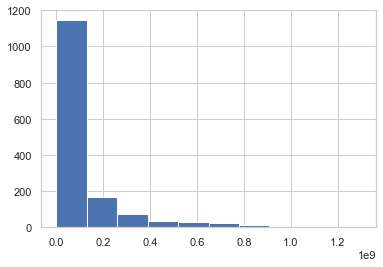

In [127]:
pd_ver.y_pred_fin.hist()

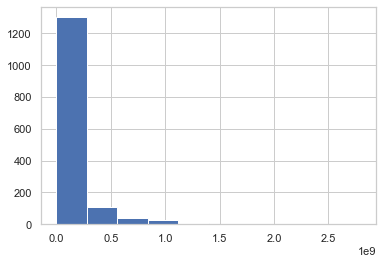

In [128]:
pd_ver.Worldwide_Gross.hist()

In [129]:
pd_ver['acuracia'] = 100 - ((abs(pd_ver.Worldwide_Gross - pd_ver.y_pred_fin)/pd_ver.Worldwide_Gross))*100

In [130]:
pd_ver['absoluteerror'] = abs((pd_ver.Worldwide_Gross) - (pd_ver.y_pred_fin))

In [131]:
pd_ver.absoluteerror.describe()

count    1.490000e+03
mean     4.950193e+07
std      9.899780e+07
min      1.486300e+04
25%      6.739596e+06
50%      1.985151e+07
75%      5.097166e+07
max      1.618585e+09
Name: absoluteerror, dtype: float64

In [132]:
mae = pd_ver.absoluteerror.mean()

In [133]:
mae

49501926.88190017

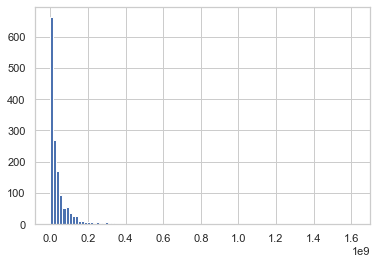

In [134]:
pd_ver.absoluteerror.hist(bins = 100)

In [135]:
sum(1 for x in pd_ver.acuracia if x<0)

193

In [136]:
pd_ver.acuracia.describe()

count    1490.000000
mean       26.631859
std       169.978957
min     -2183.418363
25%        37.316959
50%        62.822950
75%        81.414253
max        99.869171
Name: acuracia, dtype: float64

In [137]:
pd_ver.acuracia.mean()

26.631858961761967

In [138]:
pd_ver.sort_values(by = 'acuracia', ascending = False).tail(10)

,tconst,primaryTitle,runtimeMinutes,FW,Worldwide_Gross,Production_Budget,positive_perc,averageRating,numVotes,directors_1_films,...,R,log_gross,cluster,y_pred,erro,abstest,erro_abstest,y_pred_fin,acuracia,absoluteerror
1036,tt1640459,Hobo with a Shotgun,86,18,834953.0,3000000.0,59.322034,6.1,43255,1,...,1,13.635131,3,16.118961,2.483831,13.635131,0.182164,10008661.00,-998.709508,9173708.00
1187,tt2265398,Drinking Buddies,90,34,407100.0,500000.0,85.123967,6.1,54996,13,...,1,12.916814,3,15.429211,2.512397,12.916814,0.194506,5021356.50,-1033.445468,4614256.50
900,tt1274300,The Tempest,110,49,277943.0,20000000.0,71.428571,5.3,7285,3,...,0,12.535171,0,15.339323,2.804152,12.535171,0.223703,4589690.00,-1451.306203,4311747.00
1345,tt3687310,Criminal Activities,94,47,386744.0,7000000.0,71.428571,5.8,8127,0,...,0,12.865518,3,15.734872,2.869354,12.865518,0.223027,6816603.50,-1562.562186,6429859.50
1110,tt1855401,Tim and Eric's Billion Dollar Movie,93,9,223652.0,3000000.0,54.054054,5.4,9245,0,...,1,12.317847,3,15.197595,2.879748,12.317847,0.233787,3983194.25,-1580.978596,3759542.25
834,tt1161418,Gentlemen Broncos,89,44,119955.0,9500000.0,51.948052,6.2,10680,2,...,0,11.694872,3,14.575220,2.880348,11.694872,0.246292,2137655.25,-1582.047643,2017700.25
1357,tt3838992,Yoga Hosers,88,30,22958.0,5000000.0,53.333333,4.3,11654,11,...,0,10.041422,3,13.068076,3.026654,10.041422,0.301417,473580.00,-1862.810349,450622.00
826,tt1137470,Accidental Love,100,12,135436.0,26000000.0,62.857143,4.1,7475,7,...,0,11.816254,0,14.901084,3.084829,11.816254,0.261067,2961137.25,-1986.373822,2825701.25
681,tt0805570,The Midnight Meat Train,98,31,1590246.0,15000000.0,75.000000,6.1,58232,8,...,1,14.279399,3,17.388456,3.109057,14.279399,0.217730,35621372.00,-2039.991297,34031126.00
901,tt1683003,The Tempest,131,49,277943.0,20000000.0,71.428571,7.6,102,3,...,0,12.535171,0,15.706292,3.171121,12.535171,0.252978,6624544.50,-2183.418363,6346601.50


## Cross Validation

In [139]:
semmin = final_generos_studios_rt.copy()

columns = semmin.drop(['tconst','primaryTitle','Worldwide_Gross','log_gross'], axis=1)

X= columns
# variável target
y = semmin['log_gross']

In [140]:
from sklearn.preprocessing import PowerTransformer
X = PowerTransformer(method='yeo-johnson').fit_transform(X)

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
from sklearn.model_selection import cross_val_score

def run_cv(X_train, y_train, k):
    model = xgb.XGBRegressor(verbosity=0)
    
    score = cross_val_score(estimator=model,\
                            X=X_train,\
                            y=y_train,\
                            scoring='r2',\
                            cv=k)
    return score

In [143]:
score20 = run_cv(X_train, y_train, 100)
print('mean', score20.mean())
print('std', score20.std())

mean 0.6122429890999588
std 0.2807792756723519


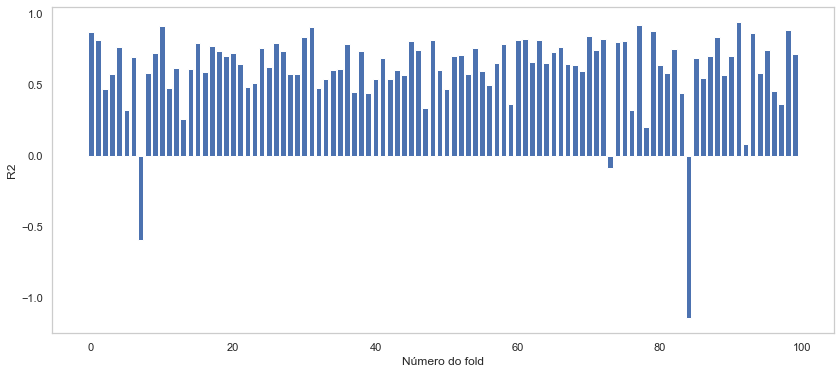

In [144]:
fig = plt.figure(figsize=(14,6))
plt.bar(range(len(score20)), score20)
plt.grid()
plt.xlabel('Número do fold')
plt.ylabel('R2');

## Feature Importance

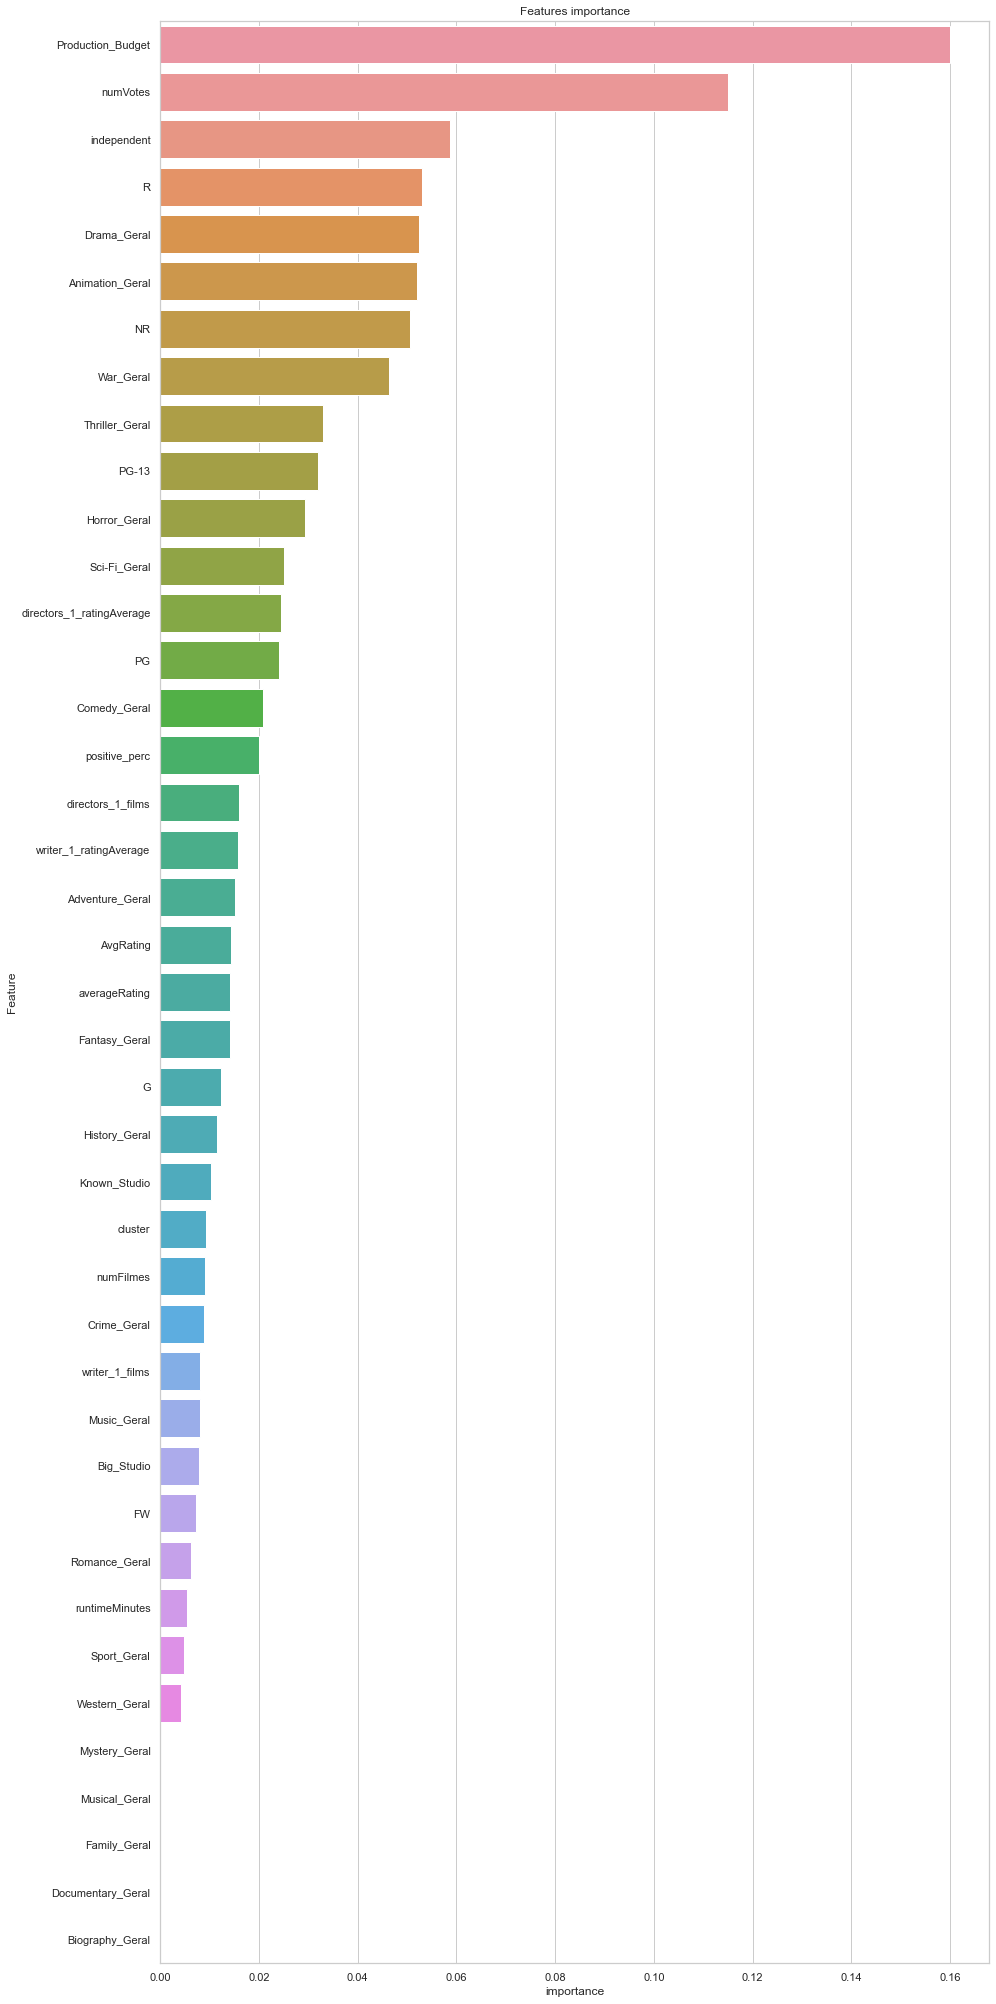

In [145]:
features = [c for c in semmin.columns if c not in ['tconst','primaryTitle','Worldwide_Gross','log_gross']]

feature_importance_df = pd.DataFrame()
fold_importance_df = pd.DataFrame()
fold_importance_df["Feature"] = features
fold_importance_df["importance"] = xgb_model.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance')
plt.tight_layout()
plt.savefig('FI.png')

## Ajuste dos Hyperparametros

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [147]:
semmin = final_generos_studios_rt.copy()

columns = semmin.drop(['tconst','primaryTitle','Worldwide_Gross','log_gross','cluster'], axis=1)

X= columns
# variável target
y = semmin['log_gross']

In [148]:
from sklearn.preprocessing import PowerTransformer
X = PowerTransformer(method='yeo-johnson').fit_transform(X)

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [151]:
def acuracy(predt: np.ndarray, dtrain: xgb.DMatrix):
    ''' Root mean squared log error metric.'''
    y = dtrain.get_label()
    MAPE = ((abs(y - predt)/y))
    return 'PyMAPE', float(np.mean(MAPE))

In [152]:
params = {# Parameters that we are going to tune.
            'max_depth':6,
            'min_child_weight': 1,
            'eta':.3,
            'subsample': 1,
            'colsample_bytree': 1,
          # Other parameters
            'objective':'reg:linear' }

num_boost_round = 999

In [153]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    feval=acuracy,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[00:42:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:12.1469	Test-PyMAPE:0.679081
Multiple eval metrics have been passed: 'Test-PyMAPE' will be used for early stopping.

Will train until Test-PyMAPE hasn't improved in 10 rounds.
[1]	Test-rmse:8.55275	Test-PyMAPE:0.475231
[2]	Test-rmse:6.03776	Test-PyMAPE:0.331625
[3]	Test-rmse:4.29663	Test-PyMAPE:0.231738
[4]	Test-rmse:3.10575	Test-PyMAPE:0.163633
[5]	Test-rmse:2.29088	Test-PyMAPE:0.117173
[6]	Test-rmse:1.74837	Test-PyMAPE:0.088083
[7]	Test-rmse:1.40796	Test-PyMAPE:0.069766
[8]	Test-rmse:1.19459	Test-PyMAPE:0.058048
[9]	Test-rmse:1.06441	Test-PyMAPE:0.050558
[10]	Test-rmse:0.994228	Test-PyMAPE:0.046277
[11]	Test-rmse:0.95068	Test-PyMAPE:0.043681
[12]	Test-rmse:0.931223	Test-PyMAPE:0.042366
[13]	Test-rmse:0.924643	Test-PyMAPE:0.041618
[14]	Test-rmse:0.916746	Test-PyMAPE:0.041016
[15]	Test-rmse:0.908225	Test-PyMAPE

In [154]:
print("Best MAPE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAPE: 0.04 with 33 rounds


In [155]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[00:42:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,12.097243,0.010659,12.098608,0.062732
1,8.483475,0.004951,8.489329,0.053286
2,5.953740,0.005053,5.956800,0.052212
3,4.184122,0.004986,4.207013,0.046599
4,2.946792,0.004659,2.996397,0.035741
5,2.085310,0.003849,2.163246,0.024334
6,1.490491,0.005951,1.601652,0.019718
7,1.084137,0.004412,1.236488,0.018479
8,0.820636,0.006768,1.004524,0.016894
9,0.652575,0.009891,0.863209,0.016091


In [156]:
cv_results['test-mae-mean'].min()

0.6776184000000001

In [157]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)]

In [158]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[00:42:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.6779383999999999 for 20 rounds
CV with max_depth=9, min_child_weight=6
[00:42:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release

In [159]:
params['max_depth'] = 10
params['min_child_weight'] = 6

In [160]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [161]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[00:43:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.6775878000000001 for 23 rounds
CV with subsample=1.0, colsample=0.9
[00:43:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/

	MAE 0.6882484000000001 for 16 rounds
CV with subsample=0.8, colsample=0.8
[00:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.693799 for 18 rounds
CV with subsample=0.8, colsample=0.7
[00:43:26] WARNING: C:/Jenkins/workspace

In [162]:
params['subsample'] = .9
params['colsample_bytree'] = 1.0

In [163]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

Wall time: 0 ns
CV with eta=0.3
[00:43:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 881 ms
	MAE 0.6745329999999999 for 20 rounds

CV with eta=0.2
[00:43:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

In [164]:
params['eta'] = .01

In [165]:
params['eval_metric'] = "mae"

In [166]:
params

{'max_depth': 10,
 'min_child_weight': 6,
 'eta': 0.01,
 'subsample': 0.9,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [167]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10)

[00:44:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:17.0419
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:16.872
[2]	Test-mae:16.7035
[3]	Test-mae:16.5368
[4]	Test-mae:16.3716
[5]	Test-mae:16.208
[6]	Test-mae:16.0464
[7]	Test-mae:15.8862
[8]	Test-mae:15.7276
[9]	Test-mae:15.571
[10]	Test-mae:15.4155
[11]	Test-mae:15.2616
[12]	Test-mae:15.1095
[13]	Test-mae:14.959
[14]	Test-mae:14.8101
[15]	Test-mae:14.6624
[16]	Test-mae:14.5161
[17]	Test-mae:14.3718
[18]	Test-mae:14.2286
[19]	Test-mae:14.0867
[20]	Test-mae:13.9462
[21]	Test-mae:13.808
[22]	Test-mae:13.6704
[23]	Test-mae:13.5338
[24]	Test-mae:13.3993
[25]	Test-mae:13.2667
[26]	Test-mae:13.1344
[27]	Test-mae:13.0035
[28]	Test-mae:12.874
[29]	Test-mae:12.7456
[30]	Test-mae:12.6184
[31]	Test-mae:12.4933
[32]	Test-mae:12.3688
[33]	Test-mae:12.2461
[34]	Test-mae:12.1241
[35]	Test-mae:12.003
[36]	

[352]	Test-mae:0.886086
[353]	Test-mae:0.88292
[354]	Test-mae:0.879983
[355]	Test-mae:0.877169
[356]	Test-mae:0.874148
[357]	Test-mae:0.871017
[358]	Test-mae:0.867844
[359]	Test-mae:0.864716
[360]	Test-mae:0.862021
[361]	Test-mae:0.859253
[362]	Test-mae:0.856375
[363]	Test-mae:0.8538
[364]	Test-mae:0.850774
[365]	Test-mae:0.848308
[366]	Test-mae:0.84561
[367]	Test-mae:0.842845
[368]	Test-mae:0.840371
[369]	Test-mae:0.837628
[370]	Test-mae:0.835185
[371]	Test-mae:0.832614
[372]	Test-mae:0.830212
[373]	Test-mae:0.827582
[374]	Test-mae:0.82539
[375]	Test-mae:0.823091
[376]	Test-mae:0.820871
[377]	Test-mae:0.818754
[378]	Test-mae:0.816463
[379]	Test-mae:0.814277
[380]	Test-mae:0.811999
[381]	Test-mae:0.809941
[382]	Test-mae:0.807821
[383]	Test-mae:0.805801
[384]	Test-mae:0.803444
[385]	Test-mae:0.801152
[386]	Test-mae:0.799129
[387]	Test-mae:0.797121
[388]	Test-mae:0.795179
[389]	Test-mae:0.793195
[390]	Test-mae:0.791306
[391]	Test-mae:0.789247
[392]	Test-mae:0.787288
[393]	Test-mae:0.7854

[695]	Test-mae:0.651007
[696]	Test-mae:0.650995
[697]	Test-mae:0.651026
[698]	Test-mae:0.650896
[699]	Test-mae:0.650904
[700]	Test-mae:0.650863
[701]	Test-mae:0.650921
[702]	Test-mae:0.650961
[703]	Test-mae:0.650806
[704]	Test-mae:0.650748
[705]	Test-mae:0.650685
[706]	Test-mae:0.650737
[707]	Test-mae:0.650914
[708]	Test-mae:0.650905
[709]	Test-mae:0.650864
[710]	Test-mae:0.650826
[711]	Test-mae:0.650685
[712]	Test-mae:0.650506
[713]	Test-mae:0.650441
[714]	Test-mae:0.650465
[715]	Test-mae:0.65051
[716]	Test-mae:0.650572
[717]	Test-mae:0.650544
[718]	Test-mae:0.650574
[719]	Test-mae:0.65049
[720]	Test-mae:0.650528
[721]	Test-mae:0.650425
[722]	Test-mae:0.650493
[723]	Test-mae:0.650361
[724]	Test-mae:0.65019
[725]	Test-mae:0.650114
[726]	Test-mae:0.649961
[727]	Test-mae:0.649852
[728]	Test-mae:0.64988
[729]	Test-mae:0.64992
[730]	Test-mae:0.649881
[731]	Test-mae:0.649842
[732]	Test-mae:0.649869
[733]	Test-mae:0.649907
[734]	Test-mae:0.649852
[735]	Test-mae:0.649827
[736]	Test-mae:0.6497

In [168]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[00:44:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:17.0419
[1]	Test-mae:16.872
[2]	Test-mae:16.7035
[3]	Test-mae:16.5368
[4]	Test-mae:16.3716
[5]	Test-mae:16.208
[6]	Test-mae:16.0464
[7]	Test-mae:15.8862
[8]	Test-mae:15.7276
[9]	Test-mae:15.571
[10]	Test-mae:15.4155
[11]	Test-mae:15.2616
[12]	Test-mae:15.1095
[13]	Test-mae:14.959
[14]	Test-mae:14.8101
[15]	Test-mae:14.6624
[16]	Test-mae:14.5161
[17]	Test-mae:14.3718
[18]	Test-mae:14.2286
[19]	Test-mae:14.0867
[20]	Test-mae:13.9462
[21]	Test-mae:13.808
[22]	Test-mae:13.6704
[23]	Test-mae:13.5338
[24]	Test-mae:13.3993
[25]	Test-mae:13.2667
[26]	Test-mae:13.1344
[27]	Test-mae:13.0035
[28]	Test-mae:12.874
[29]	Test-mae:12.7456
[30]	Test-mae:12.6184
[31]	Test-mae:12.4933
[32]	Test-mae:12.3688
[33]	Test-mae:12.2461
[34]	Test-mae:12.1241
[35]	Test-mae:12.003
[36]	Test-mae:11.8835
[37]	Test-mae:11.7651
[38]	Test-mae:11.

[355]	Test-mae:0.877169
[356]	Test-mae:0.874148
[357]	Test-mae:0.871017
[358]	Test-mae:0.867844
[359]	Test-mae:0.864716
[360]	Test-mae:0.862021
[361]	Test-mae:0.859253
[362]	Test-mae:0.856375
[363]	Test-mae:0.8538
[364]	Test-mae:0.850774
[365]	Test-mae:0.848308
[366]	Test-mae:0.84561
[367]	Test-mae:0.842845
[368]	Test-mae:0.840371
[369]	Test-mae:0.837628
[370]	Test-mae:0.835185
[371]	Test-mae:0.832614
[372]	Test-mae:0.830212
[373]	Test-mae:0.827582
[374]	Test-mae:0.82539
[375]	Test-mae:0.823091
[376]	Test-mae:0.820871
[377]	Test-mae:0.818754
[378]	Test-mae:0.816463
[379]	Test-mae:0.814277
[380]	Test-mae:0.811999
[381]	Test-mae:0.809941
[382]	Test-mae:0.807821
[383]	Test-mae:0.805801
[384]	Test-mae:0.803444
[385]	Test-mae:0.801152
[386]	Test-mae:0.799129
[387]	Test-mae:0.797121
[388]	Test-mae:0.795179
[389]	Test-mae:0.793195
[390]	Test-mae:0.791306
[391]	Test-mae:0.789247
[392]	Test-mae:0.787288
[393]	Test-mae:0.785437
[394]	Test-mae:0.783621
[395]	Test-mae:0.781771
[396]	Test-mae:0.779

[698]	Test-mae:0.650896
[699]	Test-mae:0.650904
[700]	Test-mae:0.650863
[701]	Test-mae:0.650921
[702]	Test-mae:0.650961
[703]	Test-mae:0.650806
[704]	Test-mae:0.650748
[705]	Test-mae:0.650685
[706]	Test-mae:0.650737
[707]	Test-mae:0.650914
[708]	Test-mae:0.650905
[709]	Test-mae:0.650864
[710]	Test-mae:0.650826
[711]	Test-mae:0.650685
[712]	Test-mae:0.650506
[713]	Test-mae:0.650441
[714]	Test-mae:0.650465
[715]	Test-mae:0.65051
[716]	Test-mae:0.650572
[717]	Test-mae:0.650544
[718]	Test-mae:0.650574
[719]	Test-mae:0.65049
[720]	Test-mae:0.650528
[721]	Test-mae:0.650425
[722]	Test-mae:0.650493
[723]	Test-mae:0.650361
[724]	Test-mae:0.65019
[725]	Test-mae:0.650114
[726]	Test-mae:0.649961
[727]	Test-mae:0.649852
[728]	Test-mae:0.64988
[729]	Test-mae:0.64992
[730]	Test-mae:0.649881
[731]	Test-mae:0.649842
[732]	Test-mae:0.649869
[733]	Test-mae:0.649907
[734]	Test-mae:0.649852
[735]	Test-mae:0.649827
[736]	Test-mae:0.649765
[737]	Test-mae:0.649783
[738]	Test-mae:0.649779
[739]	Test-mae:0.6496

## Testando o Modelo Hyperparametrizado

In [169]:
y_pred = best_model.predict(dtest)

In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
Accuracy = 100-(np.sum(np.abs((y_test - y_pred)/y_test))*100)/len(y_test)

In [171]:
d = {'MAE': [MAE.round(4)],'MSE': [MSE.round(4)], 'RMSE': [rmse.round(4)], 'Accuracy': [Accuracy.round(4)]}
modelos = pd.DataFrame(data = d)

In [172]:
modelos

,MAE,MSE,RMSE,Accuracy
0,0.6494,0.762,0.873,96.1129


### Numeros Reais

In [173]:
np.exp(0.657)

1.9289966552642908

In [174]:
y_pred_exp = np.exp(y_pred)

In [175]:
y_test_exp = np.exp(y_test)

In [176]:
AE = abs(y_pred_exp - y_test_exp)

In [177]:
MAE = np.mean(AE)

In [178]:
MAE

53534620.023489945

In [179]:
APE = abs(y_pred_exp - y_test_exp)/y_test_exp

In [180]:
MAPE = np.mean(APE)*100

In [181]:
MAPE

103.4762605606285

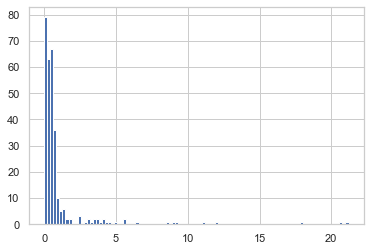

In [182]:
APE.hist(bins = 100)

In [183]:
APE.describe()

count    298.000000
mean       1.034763
std        2.458675
min        0.002272
25%        0.192271
50%        0.442150
75%        0.687857
max       21.200805
Name: log_gross, dtype: float64

In [184]:
APE.max()

21.200804666652875

In [185]:
MAE/final.Worldwide_Gross.mean()

0.38552533269248873